<a href="https://colab.research.google.com/github/waacot/DL_SVHN_DigitRecognition/blob/main/High_Code_SVHN_Digit_Recognition_LaurentVernet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**
```code
@ Author : Laurent Vernet
@ Elective Project :  Deep Learning
@ Date : 09/28/2023
````
# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [1]:
# numpy package for scientific computing with Python
import numpy as np

# pandas package for data analysis and manipulation tool
import pandas as pd

# matplotlib library for creating static, animated, and interactive
# visualizations
import matplotlib.pyplot as plt

# seaborn high-level package for drawing attractive and informative statistical
# graphics
import seaborn as sns

# scikit-learn librairies for Machine Learning in Python
#
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical


**Let us check the version of tensorflow.**

In [ ]:
print("Tensorflow version :",tf.__version__)

Tensorflow version : 2.13.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Modify path according to your own file path
path = "/content/drive/MyDrive/MIT-PE_Notebooks/Elective Project/SVHN Digit Recognition/SVHN_single_grey1.h5"

# using h5 file dedicated librairies.
import h5py
h5file = h5py.File(path, 'r')

# h5file is like a dictionnary and have keys.
list(h5file.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
# we can directly access 'train' and 'test' dataset with their respective 'key'
# adding array index to retrieve a numpy ndarray, and all its methods.

X_train=h5file.get('X_train')[:]
X_test=h5file.get('X_test')[:]
X_val=h5file.get('X_val')[:]
y_train=h5file.get('y_train')[:]
y_test=h5file.get('y_test')[:]
y_val=h5file.get('y_val')[:]



Check the number of images in the training and the testing dataset.

In [ ]:
print('Number of Images in X_train is [{}] and in X_test is [{}]'.format(len(X_train),len(X_test)))
# X_train, X_test, X_val, y_train, y_test, y_val

Number of Images in X_train is [42000] and in X_test is [18000]


**Observation:**
* We observe that loaded H5 file contains multiple datasets : ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
* **X_train** contains **42 000** entries(images) of size *32 x 32*,
* **X_test** conatins **18 000** images of size *32 x 32*.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

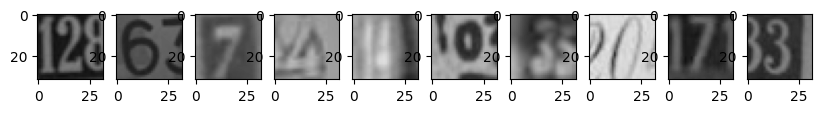

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
def first_images(dataset, number=10):
  plt.figure(figsize = (10, 1))
  for i in range(number):
    plt.subplot(1, 10, i+1)
    img = dataset[i]
    plt.imshow(img,cmap='gray',vmin=0,vmax=255) # recommendation to get a grayscale images with values between 0 and 255.
  plt.show()

first_images(X_train,10)
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.

print("Shape:" ,X_train[0].shape)
print("Pixel array of First Image:",X_train[0])

Shape: (32, 32)
Pixel array of First Image: [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# ADDED LVE // TO BE REMOVE
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array
X_train= X_train.reshape(X_train.shape[0], 1024)
X_test=X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalize the train and the test dataset by dividing by 255.
X_train = X_train / 255
X_test = X_test / 255

Print the shapes of Training and Test data

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**


Help : One-hot encode transform vector with scalar (integer) to a binary matrix
Useful for later cross_entropy evaluation
```code
>>> a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
>>> print(a)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
```

In [ ]:
# One-hot encode the target variable.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Test labels

y_test.shape , y_train.shape


((18000, 10), (42000, 10))

In [ ]:
y_test[0,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Observation:**
* One-hot encode have transformed vector with scalar (integer) to a binary matrix Useful for later cross_entropy evaluation.
* y_train contains 42000 entries with 10x10 (10 arrays with 10 values) binary matrix
* y_test contains 18000 entries with 10x10 (10 arrays with 10 values) binary matrix


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators

np.random.seed(84)
import random
random.seed(84)
tf.random.set_seed(84)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def nn_model_1():
  model = Sequential()

  # Add layers as per the architecture mentioned above in the same sequence

  # First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
  layer1 = Dense(units=64,activation=tf.nn.relu,input_shape=(1024,))

  model.add(layer1)

  # Second hidden layer with 32 nodes and the relu activation
  layer2 = Dense(32,activation=tf.nn.relu)
  model.add(layer2)

  # Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  output_layer= Dense(10,activation=tf.nn.softmax)
  model.add(output_layer)

  # Compile the model
  # ... with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy
  model.compile(loss=tf.losses.categorical_crossentropy, optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics="accuracy")
  return model


In [ ]:

# Call the nn_model_1 function and store the model in a new variable.
model1 = nn_model_1()


In [ ]:

# Print the summary of the model.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# LVE TBR
# Plotting the model
# tf.keras.utils.plot_model(model1,show_shapes=True,)

In [ ]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.

history_model_1 = model1.fit(x=X_train, y=y_train,validation_split=0.2, batch_size=128,verbose=1,epochs=20)

Epoch 1/20
263/263 [==============================] - 8s 7ms/step - loss: 2.3069 - accuracy: 0.0987 - val_loss: 2.3022 - val_accuracy: 0.0981
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.2738 - accuracy: 0.1207 - val_loss: 2.2095 - val_accuracy: 0.1532
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 2.1542 - accuracy: 0.1821 - val_loss: 2.1076 - val_accuracy: 0.2079
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0808 - accuracy: 0.2030 - val_loss: 2.0424 - val_accuracy: 0.2219
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0326 - accuracy: 0.2243 - val_loss: 2.0147 - val_accuracy: 0.2251
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0083 - accuracy: 0.2335 - val_loss: 1.9982 - val_accuracy: 0.2269
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.9925 - accuracy: 0.2404 - val_loss: 1.9842 - val_accuracy: 0.2388
Epoch 

**Vocabulary for 'non-expert':**

* **loss**: This is the value of the cost function for the training data. It represents how well the model is performing on the training data. The lower the loss, the better the model is at making accurate predictions on the training data.

* **accuracy**: Percentage of correct predictions made by your model on the training data.

* **val_loss**: Value of the cost function for the validation data. It represents how well a model is performing on the validation data. Like the loss, the lower the val_loss, the better.

* **val_acc**: Percentage of correct predictions made by the model on the validation data.

### **Plot the Training and Validation Accuracies and write down your Observations.**

<built-in method keys of dict object at 0x7cf50a0f4140>


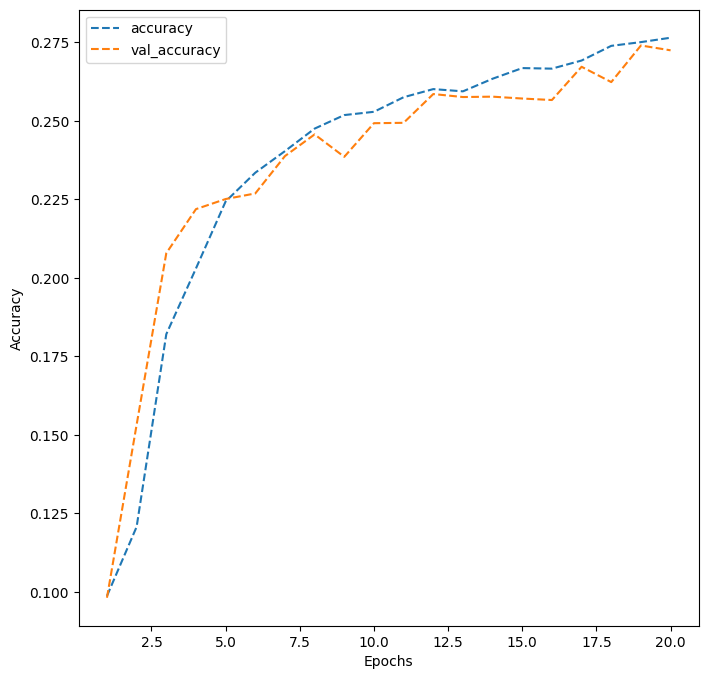

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history
print(dict_hist.keys)
list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
* We can observe that the model's accuracy increases with the increase of the number of epochs, from the 1th to the 10th epoch.
* From 10+ epoch accuracy tends to stabilize over **25%**
* For the max epoch, 20, we are getting an accuracy of about **27.5%** for the training data and about **27%** for the validation data, which is not good.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(84)
import random
random.seed(84)
tf.random.set_seed(84)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
  model = Sequential()

  # Add layers as per the architecture mentioned above in the same sequence

  # First hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
  layer1 = Dense(256,activation=tf.nn.relu,input_shape=(1024,))
  model.add(layer1)

  # Second hidden layer with 128 nodes and the relu activation
  layer2 = Dense(128,activation=tf.nn.relu)
  model.add(layer2)

  #Add the Dropout layer with the rate equal to 0.2
  layer3 = Dropout(rate=0.2)
  model.add(layer3)

  #Third hidden layer with 64 nodes and the relu activation
  layer4 = Dense(64,activation=tf.nn.relu)
  model.add(layer4)

  #Fourth hidden layer with 64 nodes and the relu activation
  layer5 = Dense(64,activation=tf.nn.relu)
  model.add(layer5)

  #Fifth hidden layer with 32 nodes and the relu activation
  layer6 = Dense(32,activation=tf.nn.relu)
  model.add(layer6)

  #Add the BatchNormalization layer
  layer7 = BatchNormalization()
  model.add(layer7)

  # Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  output_layer= Dense(10,activation=tf.nn.softmax)
  model.add(output_layer)

  # Compile the model
  # ... with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'.
  model.compile(loss=tf.losses.categorical_crossentropy, optimizer=tf.optimizers.Adam(learning_rate=0.005), metrics="accuracy")
  return model

In [ ]:

# Call the nn_model_2 function and store the model in a new variable.
model2 = nn_model_2()


In [ ]:

# Print the summary of the model.
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# Fit on the train data with
# * a validation split of 0.2,
# * batch size = 128,
# * verbose = 1,
# * epochs = 30.
#Store the model building history to use later for visualization.

history_model_2 = model2.fit(x=X_train, y=y_train,validation_split=0.2, batch_size=128,verbose=1,epochs=30)

Epoch 1/30
263/263 [==============================] - 4s 6ms/step - loss: 2.3188 - accuracy: 0.1011 - val_loss: 2.3255 - val_accuracy: 0.1002
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 2.3067 - accuracy: 0.0993 - val_loss: 2.3071 - val_accuracy: 0.0994
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3061 - accuracy: 0.1020 - val_loss: 2.3076 - val_accuracy: 0.0973
Epoch 4/30
263/263 [==============================] - 2s 7ms/step - loss: 2.3062 - accuracy: 0.1024 - val_loss: 2.3043 - val_accuracy: 0.0998
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 2.3039 - accuracy: 0.1050 - val_loss: 2.3395 - val_accuracy: 0.1102
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1508 - accuracy: 0.1821 - val_loss: 2.2691 - val_accuracy: 0.1890
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.9220 - accuracy: 0.2874 - val_loss: 1.7946 - val_accuracy: 0.3486
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


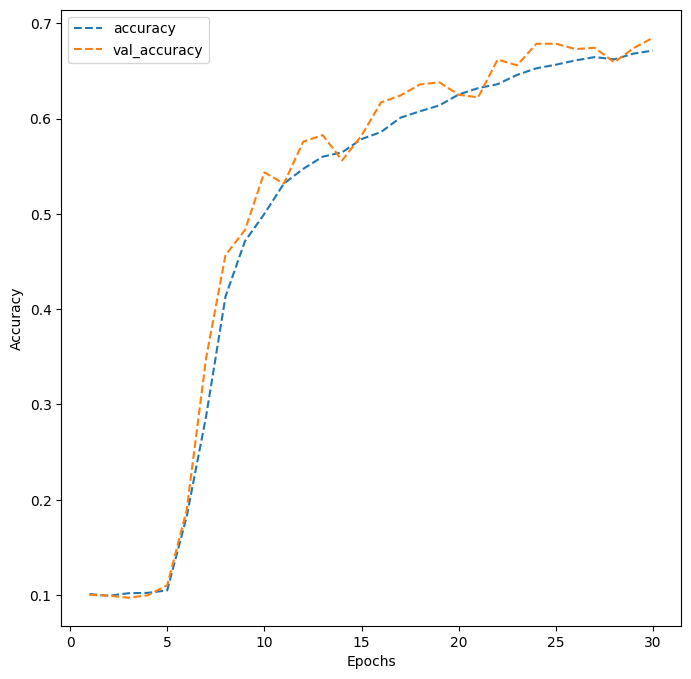

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history
print(dict_hist.keys())
list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- We can observe that the model's accuracy increases with the number of epochs, from the 5th to the 15th epoch.
- From 15+ epoch accuracy tends to stabilize over **55%**  
- '**accuracy**' and '**val_accuracy**' are evolving the same way, meaning there is no overfitting on the training data, although the model can be improved
- For 30 epochs, we are getting an accuracy of about **63%** for the training data and about 64% for the validation data, which is not enough.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1814
           1       0.60      0.80      0.68      1828
           2       0.79      0.61      0.69      1803
           3       0.75      0.59      0.66      1719
           4       0.76      0.77      0.76      1812
           5       0.61      0.65      0.63      1768
           6       0.67      0.71      0.69      1832
           7       0.76      0.73      0.75      1808
           8       0.60      0.62      0.61      1812
           9       0.71      0.68      0.69      1804

    accuracy                           0.69     18000
   macro avg       0.70      0.69      0.69     18000
weighted avg       0.70      0.69      0.69     18000



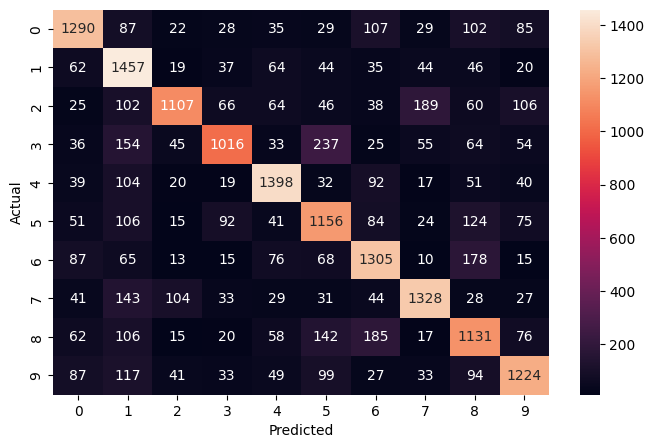

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_true=y_test, y_pred=test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true=y_test, y_pred=test_pred)   #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
* **model2** is better than **model1** but is still not so good with an average accuracy of **65%**.
* Better '**precision**' is for class '7' with **79%** , the lesser is for class '8' with **55%**.
* the '**F1-score**' which can be considered as a global performance measure of a model is (0.64) **64%** for 'model2'
* A Convolutional Neural Network could be a better fit for Images recognition

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Getting data from h5 file

X_train=h5file.get('X_train')[:]
X_test=h5file.get('X_test')[:]
X_val=h5file.get('X_val')[:]
y_train=h5file.get('y_train')[:]
y_test=h5file.get('y_test')[:]
y_val=h5file.get('y_val')[:]

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

* We can observe 42000 entries for training dataset, and 18000 for testing dataset.  

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape of X_train's first element : {}".format(X_train[0].shape))
print("Array of Pixel of X_train's first element:")
print(X_train[0])

Shape of X_train's first element : (32, 32, 1)
Array of Pixel of X_train's first element:
[[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255


Print New shape of Training and Test

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000, 10)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Test labels
y_train.shape, y_test.shape,

#y_test

((42000, 10, 2), (18000, 10))

**Observation:**

* One-hot encode have transformed vector with scalar (integer) to a binary matrix Useful for later cross_entropy evaluation.
* **y_train** contains **42000** entries with 10x10 (10 arrays with 10 values) binary matrix
* **y_test** contains **18000** entries with 10x10 (10 arrays with 10 values) binary matrix


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
np.random.seed(84)
import random
random.seed(84)
tf.random.set_seed(84)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
from sklearn import metrics
from keras.src.optimizers import optimizer

from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, LeakyReLU

def cnn_model_1():

  model = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  layer1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1))
  model.add(layer1)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer2 = LeakyReLU(alpha=0.1)
  model.add(layer2)

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  layer3 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same')
  model.add(layer3)

  # Another LeakyRelu with the slope equal to 0.1
  layer4 = LeakyReLU(alpha=0.1)
  model.add(layer4)

  # A max-pooling layer with a pool size of 2x2
  layer5 = MaxPooling2D(pool_size=(2, 2))
  model.add(layer5)

  # Flatten the output from the previous layer
  model.add(Flatten())

  # Add a dense layer with 32 nodes
  layer7=Dense(32)
  model.add(layer7)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer8=LeakyReLU(alpha=0.1)
  model.add(layer8)

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  output_layer= Dense(10,activation=tf.nn.softmax)
  model.add(output_layer)


  # Compile the model with :
  # * the loss equal to categorical_crossentropy.
  # * optimizer equal to Adam(learning_rate = 0.001)
  # * metric equal to 'accuracy'.
  model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics='accuracy')

  return model



In [ ]:
# Call the function cnn_model_1 and store the output in a new variable.
cnn_model_1 = cnn_model_1()

In [ ]:
# Print the summary of the model.
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# LVE TBR
# tf.keras.utils.plot_model(cnn_model_1,show_shapes=True)

In [ ]:
# @title
# Fit the model on the training data with :
# * a validation split of 0.2,
# * batch size = 32,
# * verbose = 1,
# * epochs = 20.

# Store the model building history to use later for visualization.

history_cnn_model_1 = cnn_model_1.fit(X_train,y_train,validation_split=0.2,batch_size=32,verbose=1,epochs=20)

Epoch 1/20
1050/1050 [==============================] - 13s 6ms/step - loss: 0.9980 - accuracy: 0.6818 - val_loss: 0.6138 - val_accuracy: 0.8264
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5294 - accuracy: 0.8462 - val_loss: 0.5123 - val_accuracy: 0.8576
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4416 - accuracy: 0.8704 - val_loss: 0.4612 - val_accuracy: 0.8719
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3800 - accuracy: 0.8875 - val_loss: 0.4571 - val_accuracy: 0.8693
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3350 - accuracy: 0.8998 - val_loss: 0.4844 - val_accuracy: 0.8625
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2975 - accuracy: 0.9113 - val_loss: 0.4572 - val_accuracy: 0.8726
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2670 - accuracy: 0.9182 - val_loss: 0.4599 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

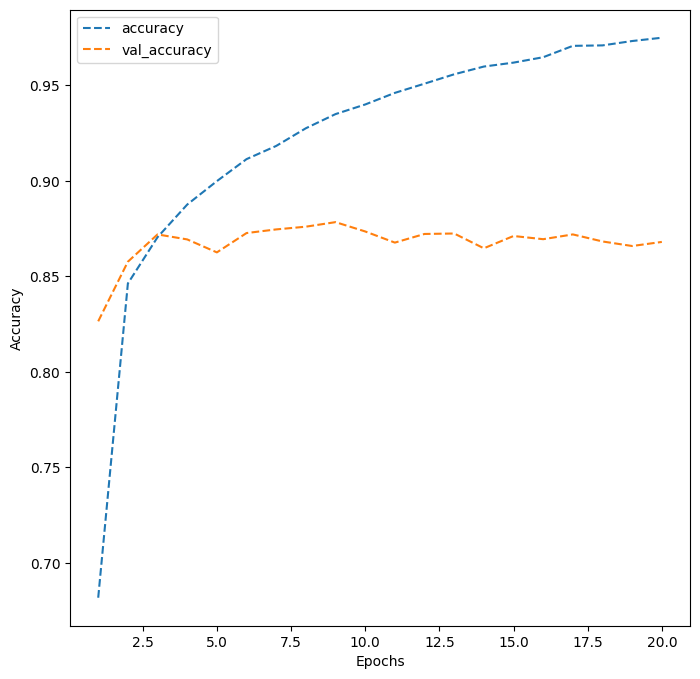

In [ ]:

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- We can observe that the model's accuracy increases quickly on the 5th first epoch.
- The '**cnn_model1**' is overfitting.
- '**accuracy**' is increasing all along the epoch til **97.42%**, but '**val_accuracy**' evolve quickly until 3 epochs to stabilize below **87.71%**  

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators

np.random.seed(84)

import random

random.seed(84)

tf.random.set_seed(84)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():

  model = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  layer1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (32, 32, 1))
  model.add(layer1)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer2 = LeakyReLU(alpha=0.1)
  model.add(layer2)

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  layer3 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same')
  model.add(layer3)

  # Add LeakyRelu with the slope equal to 0.1
  layer4 = LeakyReLU(alpha=0.1)
  model.add(layer4)

  # Add a max-pooling layer with a pool size of 2x2
  layer5 = MaxPooling2D(pool_size=(2, 2))
  model.add(layer5)

  # Add a BatchNormalization layer
  layer6=BatchNormalization()
  model.add(layer6)

  # Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  layer7 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same')
  model.add(layer7)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer8 = LeakyReLU(alpha=0.1)
  model.add(layer8)

  # Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
  layer9 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same')
  model.add(layer9)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer10 = LeakyReLU(alpha=0.1)
  model.add(layer10)

  # Add a max-pooling layer with a pool size of 2x2
  layer11 = MaxPooling2D(pool_size=(2, 2))
  model.add(layer11)

  # Add a BatchNormalization layer
  layer12=BatchNormalization()
  model.add(layer12)

  # Flatten the output from the previous layer
  # layer12
  model.add(Flatten())

  # Add a dense layer with 32 nodes
  layer13 = Dense(32)
  model.add(layer13)

  # Add a LeakyRelu layer with the slope equal to 0.1
  layer14 = LeakyReLU(alpha=0.1)
  model.add(layer14)

  # Add a dropout layer with the rate equal to 0.5
  layer15 = Dropout(rate=0.5)

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  output_layer= Dense(10,activation=tf.nn.softmax)
  model.add(output_layer)


  # Compile the model with :
  # * the categorical_crossentropy loss
  # * adam optimizers (learning_rate = 0.001)
  # * metric equal to 'accuracy'.
  model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics='accuracy')

  return model

In [ ]:
# Call the function cnn_model_2 and store the model in a new variable.
cnn_model_2 = cnn_model_2()

In [ ]:
# Print the summary of the model.
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model on the train data with :
# * a validation split of 0.2,
# * batch size = 128,
# * verbose = 1,
# * epochs = 30.

# Store the model building history to use later for visualization.

history_cnn_model_2 = cnn_model_2.fit(X_train,y_train,validation_split=0.2,batch_size=128,verbose=1,epochs=30)

Epoch 1/30
263/263 [==============================] - 7s 12ms/step - loss: 0.8380 - accuracy: 0.7320 - val_loss: 2.1525 - val_accuracy: 0.2074
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3687 - accuracy: 0.8890 - val_loss: 0.5521 - val_accuracy: 0.8336
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.2725 - accuracy: 0.9174 - val_loss: 0.3991 - val_accuracy: 0.8810
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 0.2137 - accuracy: 0.9362 - val_loss: 0.3759 - val_accuracy: 0.8976
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.1685 - accuracy: 0.9493 - val_loss: 0.3923 - val_accuracy: 0.8982
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 0.1327 - accuracy: 0.9608 - val_loss: 0.4077 - val_accuracy: 0.8899
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 0.1010 - accuracy: 0.9697 - val_loss: 0.4273 - val_accuracy: 0.8958
E

### **Plot the Training and Validation accuracies and write your observations.**

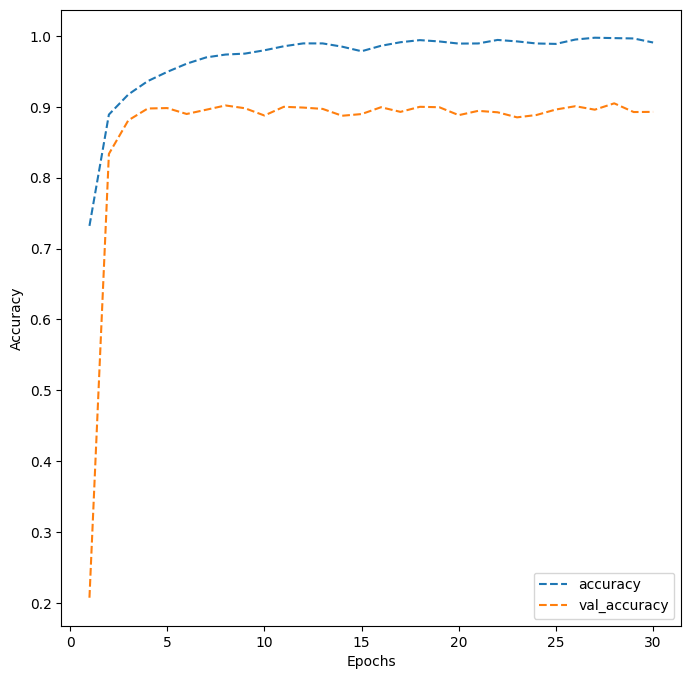

In [ ]:
dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()


**Observations:**
- We can observe that the model's accuracy increases quickly on the first 3 epochs.
- The '**cnn_model2**' is not overfitting.
- '**accuracy**' is over **91.77%** since the 3rd epochs, with the max value at '**99.64%**'
- '**val_accuracy**' is between **85.65%** and **90.27%**.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test,verbose=1)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1814
           1       0.88      0.90      0.89      1828
           2       0.92      0.91      0.92      1803
           3       0.85      0.87      0.86      1719
           4       0.94      0.88      0.91      1812
           5       0.85      0.91      0.88      1768
           6       0.90      0.86      0.88      1832
           7       0.94      0.89      0.92      1808
           8       0.89      0.85      0.87      1812
           9       0.88      0.89      0.88      1804

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000



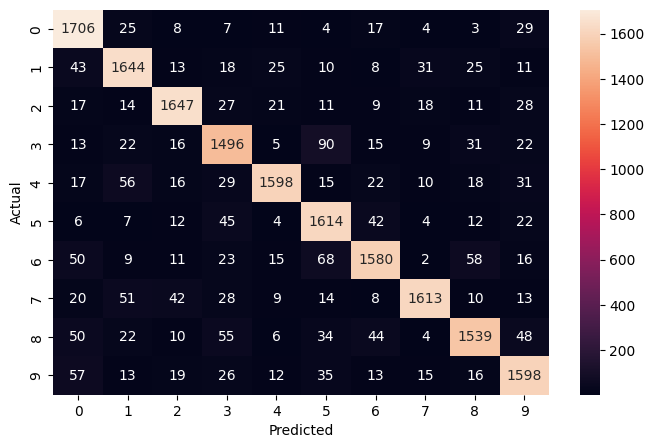

In [ ]:

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**

- '**cnn_model2**' is better than '**cnn_model1**'
- Better '**precision**' is for class '7' with **95%** , the lesser is for class '8' with **86%**.
- '**average accuracy**'  is **90%**
- the '**F1-score**',  a global performance measure of a model is **90%**
- A Convolutional Neural Network is a better fit for Images recognition

Let's visualize the images from the test data.

We will randomly select 8 images from the test data and visualize them.
The title of each image would show the actual and predicted label of that image and the probability of the predicted class.
Higher the probability more confident the model is about the prediction.

563/563 [==============================] - 1s 2ms/step


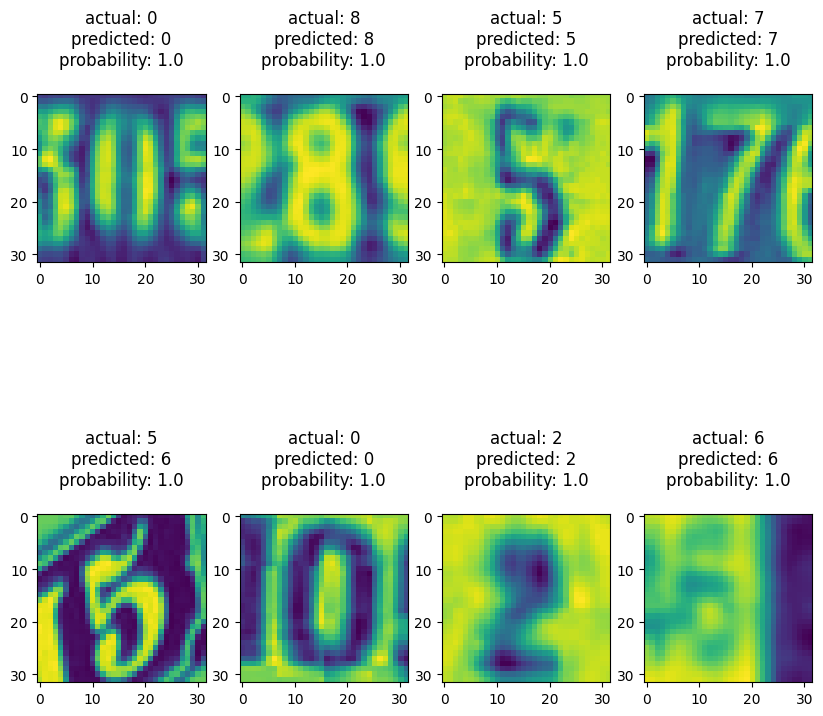

In [ ]:
import matplotlib.pyplot as plt

def random_view():

  class_names_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

  rows = 2
  cols = 4

  fig = plt.figure(figsize = (10, 10))

  for i in range(cols):

      for j in range(rows):

          random_index = np.random.randint(0, len(y_test))

          ax = fig.add_subplot(rows, cols, i * rows + j + 1)

          ax.imshow(X_test[random_index, :])

          pred_label = class_names_list[test_pred[random_index]]

          true_label = class_names_list[y_test[random_index]]

          y_pred_test_max_probas = np.max(cnn_model_2.predict(X_test), axis = -1)

          pred_proba = y_pred_test_max_probas[random_index]

          ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
                true_label, pred_label, pred_proba
          ))

  plt.show()

random_view()

**Conclusion:**

- First and Second ANNs have respectively 25% and 65% of accuracy.

- They are not overfitting, but too few accurate.

- '**model2**' has a **F1-score** of **65%**, which is not enought for image classification.

- We observed that CNN models are globally better that ANN model for images classification

- The first '**cnn_model1**' with less layer is overfitting.

- The second '**cnn_model2**' with more layer, alternatively, *Convolution*, *ReLU*, *max-pooling*, *BatchNormalization  is not overvitting.

- '**cnn_model2**' has a 'F1-score' of **90%**, which is pretty good for image classification.

- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer of CNNs.

- To get better accuracies, one can try to add more convolutional filters, more convolutional, and dense layers. However, adding more nodes also increases the time required to fit the model, and hence there is a trade-off.

- In such a case, batch normalization comes in handy. It can speed up the training process.

**Recommendations:**
 - Play around with hyperparameters and see if we can improve the accuracy.
 - Try out different optimizers and assess their effectiveness.
 - Also, try out the initializers to check their effect on the model building process.